In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sns


In [4]:
x_train=pd.read_csv('train.csv')
x_train=shuffle(x_train)
y_train=x_train[['label']]
y_train.shape
x_train.drop(labels='label',axis=1,inplace=True)

In [3]:
x_train=np.array(x_train).reshape(len(x_train),28,28,1)
print(x_train.shape)
y_train=np.array(y_train)
print(y_train.shape)


(60000, 28, 28, 1)
(60000, 1)


In [4]:
x_train,x_test,y_train,y_val=tts(x_train,y_train,test_size=0.2,random_state=42)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)


(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 1)
(12000, 1)


In [7]:
model=keras.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',kernel_regularizer='l2'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu',kernel_regularizer='l2'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512,activation='relu',kernel_regularizer='l2'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10,activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               590336    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [9]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 5))

In [10]:
model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=256)

Train on 38400 samples, validate on 9600 samples
Epoch 1/10
38400/38400 [==============================] - 8s 221us/sample - loss: 9.2286 - acc: 0.8868 - val_loss: 5.4776 - val_acc: 0.9845 9.9584 
Epoch 2/10
38400/38400 [==============================] - 5s 134us/sample - loss: 4.0275 - acc: 0.9782 - val_loss: 2.8722 - val_acc: 0.9900.8664 - acc: 0.97 - ETA: 2s - loss: 4.8239 - - ET
Epoch 3/10
38400/38400 [==============================] - 5s 137us/sample - loss: 2.2301 - acc: 0.9835 - val_loss: 1.6884 - val_acc: 0.9866
Epoch 4/10
38400/38400 [==============================] - 5s 138us/sample - loss: 1.3479 - acc: 0.9854 - val_loss: 1.0484 - val_acc: 0.9903
Epoch 5/10
38400/38400 [==============================] - 5s 137us/sample - loss: 0.8729 - acc: 0.9862 - val_loss: 0.7101 - val_acc: 0.9871
Epoch 6/10
38400/38400 [==============================] - 5s 135us/sample - loss: 0.5930 - acc: 0.9869 - val_loss: 0.4954 - val_acc: 0.9871
Epoch 7/10
38400/38400 [==============================

In [11]:
plt.semilogx(model.history.history['lr'],model.history.history['loss'])
plt.axis([1e-5,1e-2,0,50])
plt.show()

KeyError: 'lr'

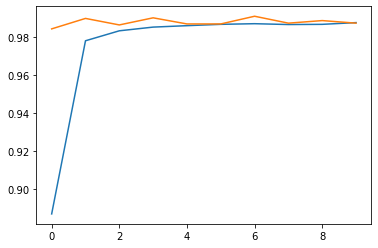

In [12]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])


plt.show()

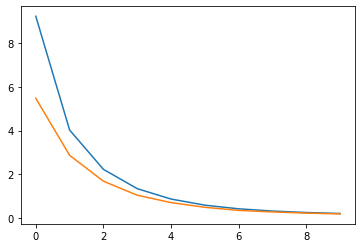

In [13]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.show()

In [14]:
y_predict=model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
y_predict.shape

(12000, 10)

In [21]:
y=[]
for row in y_predict:
    y.append(np.argmax(row))

In [24]:
y=np.array(y)
y.shape

(12000,)

In [25]:
confusion_matrix(y_val,y)

array([[1188,   16,    0,   12,    0,    0,    0,    0,    0,    0],
       [   3, 1230,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1, 1153,    7,    0,    0,    0,    0,    0,    0],
       [   2,    1,    0, 1176,    0,    0,    0,    3,    0,    0],
       [   1,    0,    0,   12, 1175,   19,    0,    0,    2,    3],
       [   0,    0,    0,    9,    0, 1194,    1,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0, 1218,    2,    0,    8],
       [   1,    0,    0,   21,    0,    0,   27, 1110,    0,    1],
       [   3,    1,    0,    0,    0,    0,    2,    0, 1238,    2],
       [   0,    0,    0,    2,    0,    0,   14,    1,    0, 1139]],
      dtype=int64)

In [26]:
accuracy_score(y_val,y)

0.9850833333333333

In [27]:
model.evaluate(x_test,y_val)

12000/12000 [==============================] - 2s 150us/sample - loss: 0.1995 - acc: 0.9851


[0.19952302054564158, 0.98508334]

In [28]:
submit_x=pd.read_csv('test.csv')
ids=submit_x[['id']]
submit_x.drop(labels='id',axis=1,inplace=True)
submit_x=np.array(submit_x).reshape(len(submit_x),28,28,1)


In [34]:
submit_y=model.predict(submit_x)

In [44]:
Y=[]
for row in submit_y:
    Y.append(np.argmax(row))

In [45]:
Y=np.array(Y)
Y.shape
Y=pd.DataFrame(Y)
submit_df=pd.concat([ids,Y],axis=1)
submit_df.to_csv('submit_file1.csv')

In [46]:
submit_y.shape

(5000, 10)

In [47]:
submit_df

,id,0
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
...,...,...
4995,4995,1
4996,4996,1
4997,4997,1
4998,4998,6
